In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree

import os
for dirname, _, filenames in os.walk('/kaggle/input/titanic'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/Titanic Machine Learning/train.csv
/kaggle/input/titanic/Titanic Machine Learning/test.csv
/kaggle/input/titanic/Titanic Machine Learning/gender_submission.csv


In [2]:
# Load dataset
file_path = '/kaggle/input/titanic/Titanic Machine Learning/train.csv'
df = pd.read_csv(file_path)

# Display basic information
print("Dataset Shape:", df.shape)
print("\nColumn Data Types:\n", df.dtypes)



Dataset Shape: (891, 12)

Column Data Types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [3]:
train_data = pd.read_csv("/kaggle/input/titanic/Titanic Machine Learning/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data = pd.read_csv("/kaggle/input/titanic/Titanic Machine Learning/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Check for missing values
missing_values = df.isnull().sum()
# Display the missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [7]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [8]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [9]:
# Display all columns
pd.set_option('display.max_columns', None)

# Display first few rows
display(df.head())

# Summary statistics
display(df.describe())


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


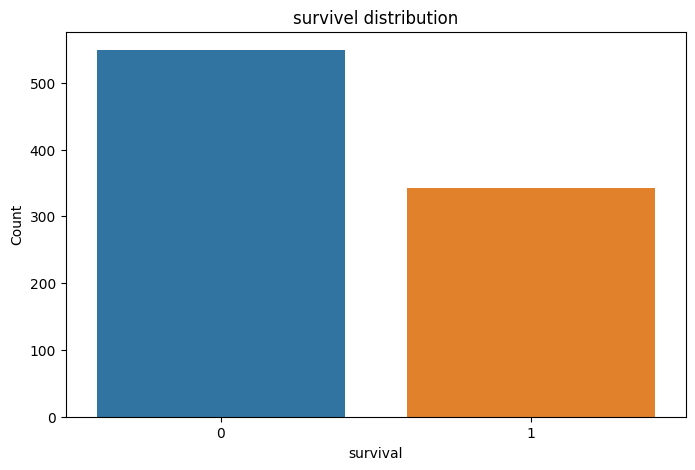

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Survived')
plt.title("survivel distribution")
plt.xlabel("survival")
plt.ylabel("Count")
plt.show()

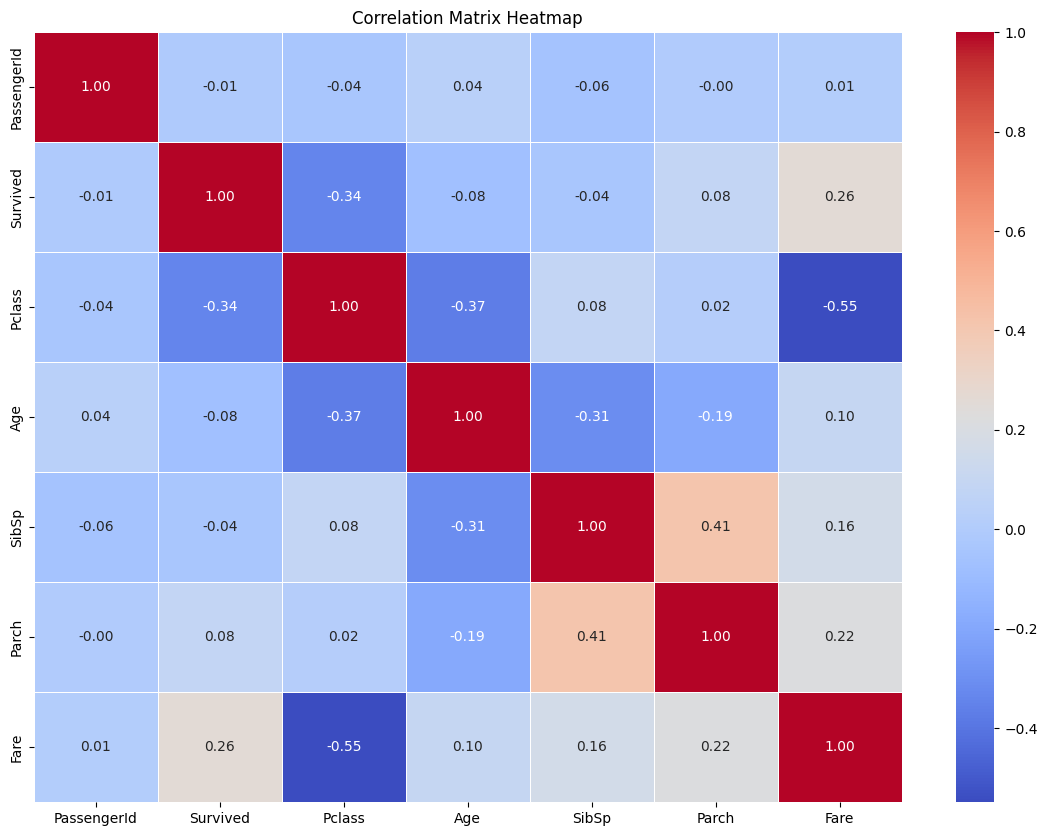

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN


In [11]:
correlation_matrix = df.corr(numeric_only=True)

# Plot correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

df = df.drop(columns = ["Ticket", "Embarked"] )
display(df.head())
#already removed it

Turn string into int (below)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C85
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,C123
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,NaN


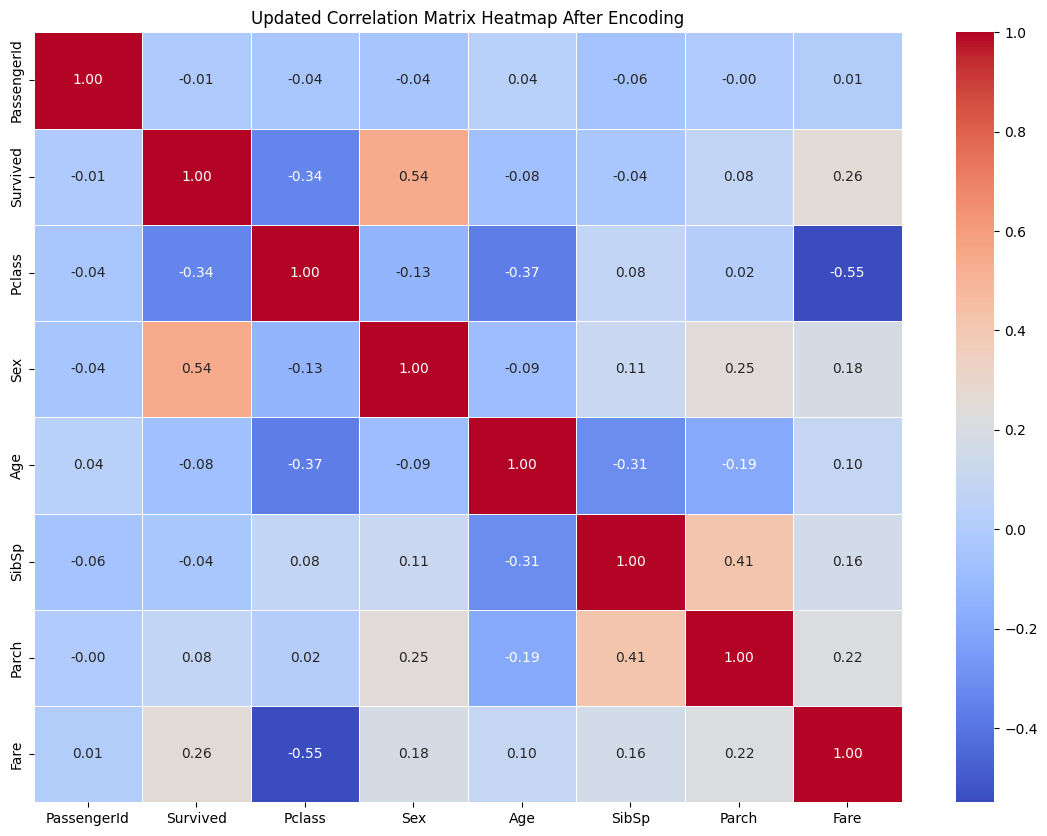

In [12]:
# Convert string columns to integers

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


display(df.head())




# Recompute correlation matrix with converted data
correlation_matrix_updated = df.corr(numeric_only=True)

# Plot updated correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix_updated, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Updated Correlation Matrix Heatmap After Encoding")
plt.show()

In [13]:
# One-hot encode remaining categorical columns
df = pd.get_dummies(df, columns=["Sex", "Age", "PassengerId", "Survived"])


# Define features and target
# X = df.drop(columns=["Survived"])
# y = df["Survived"]




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
df.head()


,Pclass,Name,SibSp,Parch,Fare,Cabin,Sex_0,Sex_1,Age_0.42,Age_0.67,Age_0.75,Age_0.83,Age_0.92,Age_1.0,Age_2.0,Age_3.0,Age_4.0,Age_5.0,Age_6.0,Age_7.0,Age_8.0,Age_9.0,Age_10.0,Age_11.0,Age_12.0,Age_13.0,Age_14.0,Age_14.5,Age_15.0,Age_16.0,Age_17.0,Age_18.0,Age_19.0,Age_20.0,Age_20.5,Age_21.0,Age_22.0,Age_23.0,Age_23.5,Age_24.0,Age_24.5,Age_25.0,Age_26.0,Age_27.0,Age_28.0,Age_28.5,Age_29.0,Age_30.0,Age_30.5,Age_31.0,Age_32.0,Age_32.5,Age_33.0,Age_34.0,Age_34.5,Age_35.0,Age_36.0,Age_36.5,Age_37.0,Age_38.0,Age_39.0,Age_40.0,Age_40.5,Age_41.0,Age_42.0,Age_43.0,Age_44.0,Age_45.0,Age_45.5,Age_46.0,Age_47.0,Age_48.0,Age_49.0,Age_50.0,Age_51.0,Age_52.0,Age_53.0,Age_54.0,Age_55.0,Age_55.5,Age_56.0,Age_57.0,Age_58.0,Age_59.0,Age_60.0,Age_61.0,Age_62.0,Age_63.0,Age_64.0,Age_65.0,Age_66.0,Age_70.0,Age_70.5,Age_71.0,Age_74.0,Age_80.0,PassengerId_1,PassengerId_2,PassengerId_3,PassengerId_4,PassengerId_5,PassengerId_6,PassengerId_7,PassengerId_8,PassengerId_9,PassengerId_10,PassengerId_11,PassengerId_12,PassengerId_13,PassengerId_14,PassengerId_15,PassengerId_16,PassengerId_17,PassengerId_18,PassengerId_19,PassengerId_20,PassengerId_21,PassengerId_22,PassengerId_23,PassengerId_24,PassengerId_25,PassengerId_26,PassengerId_27,PassengerId_28,PassengerId_29,PassengerId_30,PassengerId_31,PassengerId_32,PassengerId_33,PassengerId_34,PassengerId_35,PassengerId_36,PassengerId_37,PassengerId_38,PassengerId_39,PassengerId_40,PassengerId_41,PassengerId_42,PassengerId_43,PassengerId_44,PassengerId_45,PassengerId_46,PassengerId_47,PassengerId_48,PassengerId_49,PassengerId_50,PassengerId_51,PassengerId_52,PassengerId_53,PassengerId_54,PassengerId_55,PassengerId_56,PassengerId_57,PassengerId_58,PassengerId_59,PassengerId_60,PassengerId_61,PassengerId_62,PassengerId_63,PassengerId_64,PassengerId_65,PassengerId_66,PassengerId_67,PassengerId_68,PassengerId_69,PassengerId_70,PassengerId_71,PassengerId_72,PassengerId_73,PassengerId_74,PassengerId_75,PassengerId_76,PassengerId_77,PassengerId_78,PassengerId_79,PassengerId_80,PassengerId_81,PassengerId_82,PassengerId_83,PassengerId_84,PassengerId_85,PassengerId_86,PassengerId_87,PassengerId_88,PassengerId_89,PassengerId_90,PassengerId_91,PassengerId_92,PassengerId_93,PassengerId_94,PassengerId_95,PassengerId_96,PassengerId_97,PassengerId_98,PassengerId_99,PassengerId_100,PassengerId_101,PassengerId_102,PassengerId_103,PassengerId_104,PassengerId_105,PassengerId_106,PassengerId_107,PassengerId_108,PassengerId_109,PassengerId_110,PassengerId_111,PassengerId_112,PassengerId_113,PassengerId_114,PassengerId_115,PassengerId_116,PassengerId_117,PassengerId_118,PassengerId_119,PassengerId_120,PassengerId_121,PassengerId_122,PassengerId_123,PassengerId_124,PassengerId_125,PassengerId_126,PassengerId_127,PassengerId_128,PassengerId_129,PassengerId_130,PassengerId_131,PassengerId_132,PassengerId_133,PassengerId_134,PassengerId_135,PassengerId_136,PassengerId_137,PassengerId_138,PassengerId_139,PassengerId_140,PassengerId_141,PassengerId_142,PassengerId_143,PassengerId_144,PassengerId_145,PassengerId_146,PassengerId_147,PassengerId_148,PassengerId_149,PassengerId_150,PassengerId_151,PassengerId_152,PassengerId_153,PassengerId_154,PassengerId_155,PassengerId_156,PassengerId_157,PassengerId_158,PassengerId_159,PassengerId_160,PassengerId_161,PassengerId_162,PassengerId_163,PassengerId_164,PassengerId_165,PassengerId_166,PassengerId_167,PassengerId_168,PassengerId_169,PassengerId_170,PassengerId_171,PassengerId_172,PassengerId_173,PassengerId_174,PassengerId_175,PassengerId_176,PassengerId_177,PassengerId_178,PassengerId_179,PassengerId_180,PassengerId_181,PassengerId_182,PassengerId_183,PassengerId_184,PassengerId_185,PassengerId_186,PassengerId_187,PassengerId_188,PassengerId_189,PassengerId_190,PassengerId_191,PassengerId_192,PassengerId_193,PassengerId_194,PassengerId_195,PassengerId_196,PassengerId_197,PassengerId_198,PassengerId_199,PassengerId_200,PassengerId_201,PassengerId_202,PassengerId_203,PassengerId_204,PassengerId_2

In [14]:
dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=7, random_state=42)
dt_clf.fit(X_train, y_train)

# Predict on test set
y_pred_dt = dt_clf.predict(X_test)

In [15]:
# Evaluate the Decision Tree model
print("Decision Tree Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Classifier Performance:
Accuracy: 0.7761194029850746

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.87      0.82       157
           1       0.78      0.64      0.70       111

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.76       268
weighted avg       0.78      0.78      0.77       268



In [16]:
# # Visualize the Decision Tree
# plt.figure(figsize=(16, 10))
# tree.plot_tree(dt_clf, feature_names=X.columns, class_names=["Died", "Survived"], filled=True, fontsize=6)
# plt.title("Decision Tree Visualization")
# plt.show()

In [17]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate model
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7835820895522388
              precision    recall  f1-score   support

           0       0.79      0.87      0.82       157
           1       0.78      0.67      0.72       111

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



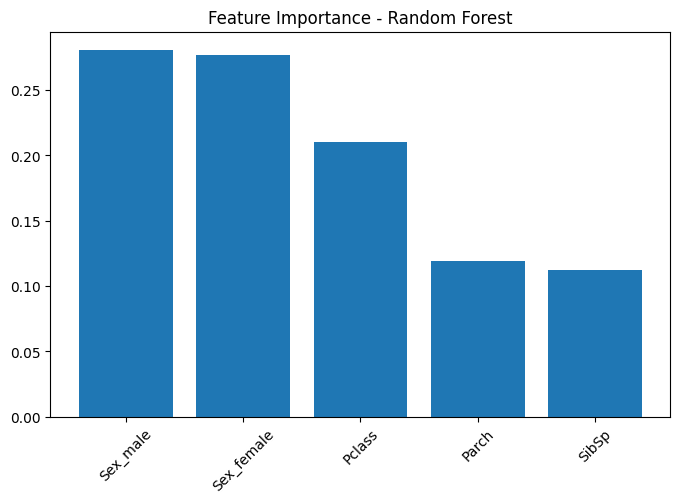

In [18]:

importances = rf_model.feature_importances_
feature_names = X.columns


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(8, 5))
plt.title("Feature Importance - Random Forest")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), np.array(feature_names)[indices], rotation=45)
plt.show()

In [19]:

df = pd.read_csv("/kaggle/input/titanic/Titanic Machine Learning/train.csv")

# Select relevant features and target
X = df[['Age', 'Sex', 'Cabin', 'PassengerId']]
# y = df['Survived'].map({'Yes': 1, 'No': 0})  # Convert to binary (already converted?)
y = df['Sex'].map({'female': 1, 'male': 0})  # Convert to binary

X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())

# Split data
print(X_train.isnull().sum())  # Check for NaNs
print(X_train.dtypes)  # Check data types




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
df.head()

Pclass        0
SibSp         0
Parch         0
Sex_female    0
Sex_male      0
dtype: int64
Pclass        int64
SibSp         int64
Parch         int64
Sex_female     bool
Sex_male       bool
dtype: object


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
from sklearn.model_selection import train_test_split

# Apply transformation before splitting
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1}).astype(int)

# Select features and target
X = df.drop(columns=['Cabin', 'PassengerId'])  # Remove non-relevant columns
y = df['Survived']  # Assuming 'Survived' is the target variable

# Now split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.dtypes)  # Check again to confirm 'Sex' is int64


Survived      int64
Pclass        int64
Name         object
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object
